$\text{Expressibility}$

The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries.


In [1]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere, array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from  math import pi, sqrt
from qiskit.circuit.library import Initialize
from qiskit.circuit.library import IGate

mpl = 'mpl'

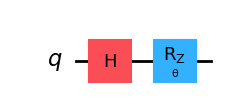

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)

qc_A.draw(mpl)


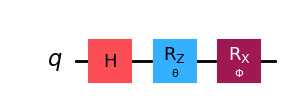

In [3]:
qc_B.draw(mpl)

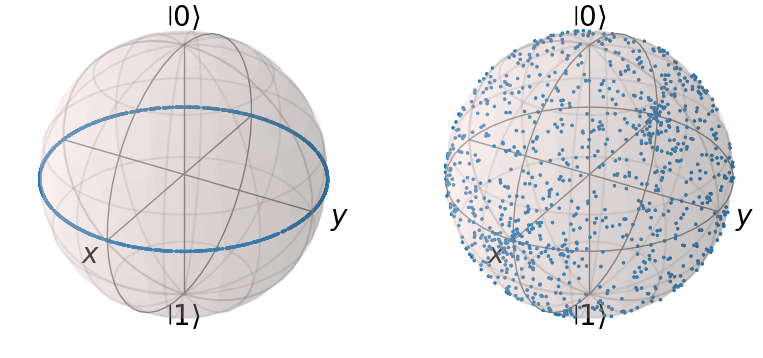

In [4]:
# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.assign_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.assign_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()


 Circuit A would have a low expressibility score due to the limited set of states it can explore, whereas Circuit B would have a high expressibility score.

$\text{Parameterized circuit using ZZfeatureMap (Data Encoding Circuits)}$

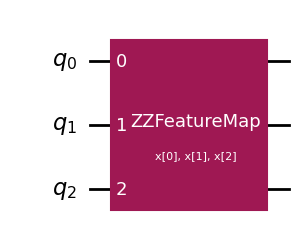

In [5]:
#ZZFeatureMap is used to encode classical data into quantum state

from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.draw(mpl)

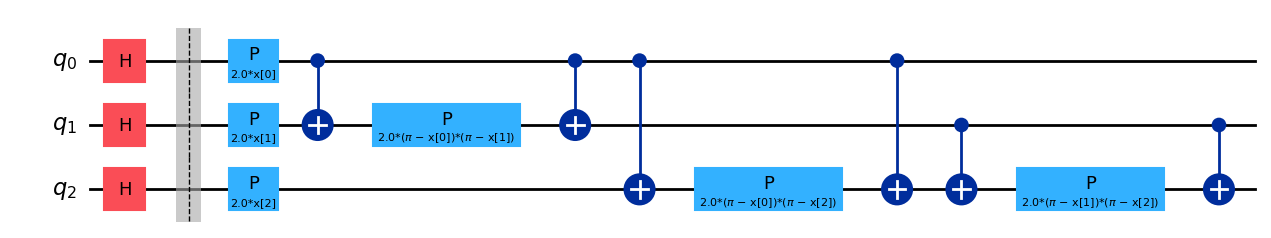

In [6]:
#decompose version
qc_zz.decompose().draw(mpl)

$\text{Parameterized Circuit using Nlocal circuits}$

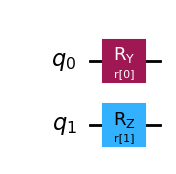

In [7]:
from qiskit.circuit.library import NLocal
from qiskit.circuit import ParameterVector
np.random.seed(0)
# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)
rot.draw(mpl)


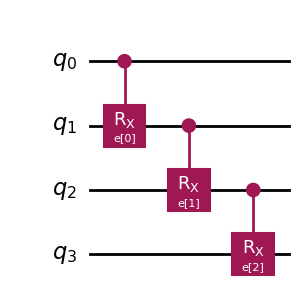

In [8]:
# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)
ent.draw(mpl)

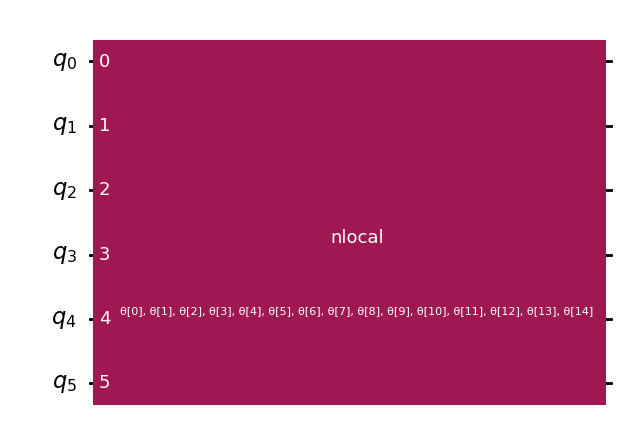

In [9]:
qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.draw(mpl)

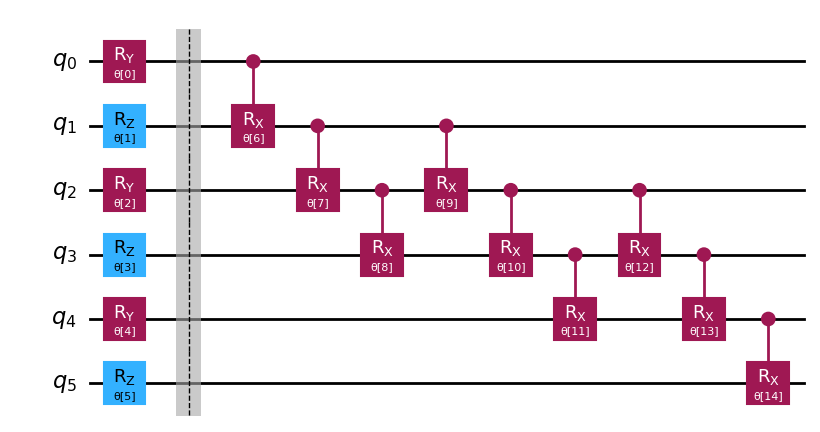

In [10]:
qc_nlocal.decompose().draw(mpl)